<a href="https://colab.research.google.com/github/spandandey21/Complete-Python-3-Bootcamp/blob/master/retry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Helpful Functions

In [0]:
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix  
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os
import requests
import base64


# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)


# Encode text values to a single dummy variable.  The new columns (which do not replace the old) will have a 1
# at every location where the original column (name) matches each of the target_values.  One column is added for
# each target value.
def encode_text_single_dummy(df, name, target_values):
    for tv in target_values:
        l = list(df[name].astype(str))
        l = [1 if str(x) == str(tv) else 0 for x in l]
        name2 = "{}-{}".format(name, tv)
        df[name2] = l


# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_


# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd



    
    

# Convert all missing values in the specified column to the median
def missing_median(df, name):
    med = df[name].median()
    df[name] = df[name].fillna(med)


# Convert all missing values in the specified column to the default
def missing_default(df, name, default_value):
    df[name] = df[name].fillna(default_value)


# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column.  Is it really this hard? :(
    target_type = df[target].dtypes
    target_type = target_type[0] if hasattr(target_type, '__iter__') else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df.as_matrix(result).astype(np.float32), dummies.as_matrix().astype(np.float32)
    else:
        # Regression
        return df.as_matrix(result).astype(np.float32), df.as_matrix([target]).astype(np.float32)

# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)


# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

# Remove all rows where the specified column is +/- sd standard deviations
def remove_outliers(df, name, sd):
    drop_rows = df.index[(np.abs(df[name] - df[name].mean()) >= (sd * df[name].std()))]
    df.drop(drop_rows, axis=0, inplace=True)


# Encode a column to a range between normalized_low and normalized_high.
def encode_numeric_range(df, name, normalized_low=-1, normalized_high=1,
                         data_low=None, data_high=None):
    if data_low is None:
        data_low = min(df[name])
        data_high = max(df[name])

    df[name] = ((df[name] - data_low) / (data_high - data_low)) \
               * (normalized_high - normalized_low) + normalized_low

In [3]:
from google.colab import files
uploaded = files.upload()

Saving b.csv to b.csv
Saving bt.csv to bt.csv
Saving e.csv to e.csv
Saving et.csv to et.csv


In [4]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

User uploaded file "b.csv" with length 722688 bytes
User uploaded file "bt.csv" with length 69522 bytes
User uploaded file "e.csv" with length 72977 bytes
User uploaded file "et.csv" with length 69351 bytes


## Reading Data

In [5]:
import pandas as pd
import io
df1 = pd.read_csv(io.StringIO(uploaded['b.csv'].decode('utf-8')))
print(df1)
df2 = pd.read_csv(io.StringIO(uploaded['e.csv'].decode('utf-8')))
print(df2)

             S1        S2         S3  ...       S12        S13  signal
0     21.679432  1.504479  -9.957744  ...  0.328209  -8.071477  Bangla
1     22.317693  0.287187  -9.879319  ...  2.796100 -14.148841  Bangla
2     22.532872  0.758670  -9.888254  ...  3.681292 -12.629527  Bangla
3     22.743923  0.901887 -10.181835  ... -0.033846 -13.066207  Bangla
4     22.805387  1.342649  -9.418506  ... -0.698241 -14.182394  Bangla
...         ...       ...        ...  ...       ...        ...     ...
4314  22.546971  2.160500  -9.836560  ...  0.844142   0.355255  Bangla
4315  22.151003  2.511947  -9.439595  ... -0.161824  -0.121897  Bangla
4316  22.018945  2.603444  -9.315688  ...  3.105475  -1.804967  Bangla
4317  22.285112  2.764023  -9.123929  ...  3.480604  -1.945926  Bangla
4318  22.214383  2.308176  -9.880267  ...  1.569070  -4.970707  Bangla

[4319 rows x 14 columns]
            S1        S2         S3  ...       S12       S13   signal
0    22.737841  2.399196 -10.172267  ...  4.119467 -

In [6]:
import pandas as pd
import io
import requests
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping

#path = "./data/"
    
#filename1 = os.path.join(path,"Clean_norm_250ms.csv")    
#df1 = pd.read_csv('b.csv',na_values=['NA','?'])

#filename2 = os.path.join(path,"Noisy_norm_250ms.csv")    
#df2 = pd.read_csv('e.csv',na_values=['NA','?'])
frames = [df1, df2]
df = pd.concat(frames, keys=['x', 'y'])

# Shuffle
np.random.seed(42)
df = df.reindex(np.random.permutation(df.index))
df.reset_index(inplace=True, drop=True)


signal = encode_text_index(df,"signal")
x,y = to_xy(df,"signal")

# Keep a 20% holdout
x_main, x_holdout, y_main, y_holdout = train_test_split(
    x, y, test_size=0.2) 


# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(
    x_main, y_main, test_size=0.2, random_state=42)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:78: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [7]:
df1


,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,signal
0,21.679432,1.504479,-9.957744,6.751679,-6.002940,6.807267,-2.029461,13.809511,9.941748,16.909974,5.348232,0.328209,-8.071477,Bangla
1,22.317693,0.287187,-9.879319,7.738654,-6.140203,7.362541,1.890642,17.393305,16.327391,24.916220,15.661765,2.796100,-14.148841,Bangla
2,22.532872,0.758670,-9.888254,8.185273,-5.043289,8.578440,0.975402,15.029722,13.541073,22.887587,13.270690,3.681292,-12.629527,Bangla
3,22.743923,0.901887,-10.181835,7.861210,-5.523244,9.158475,1.240076,14.818314,9.953380,18.919487,9.761265,-0.033846,-13.066207,Bangla
4,22.805387,1.342649,-9.418506,6.871316,-6.178653,7.622323,2.249028,15.520012,9.847824,19.792311,14.239703,-0.698241,-14.182394,Bangla
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4314,22.546971,2.160500,-9.836560,6.929788,-7.864586,6.985059,-3.295849,3.538401,-8.700346,-3.784008,-8.629158,0.844142,0.355255,Bangla
4315,22.151003,2.511947,-9.439595,7.880640,-7.551974,6.231159,-3.677819,6.861044,-6.599741,-2.335452,-5.473506,-0.161824,-0.121897,Bangla
4316,22.018945,2.603444,-9.315688,9.468042,-5.692170,7.370515,-6.362984,8.010874,-6.433576,-5.195874,-11.393312,3.105475,-1.804967,Bangla
4317,22.285112,2.764023,-9.123929,9.345041,-5.697530,6.962715,-6.329002,8.447740,-2.695686,-0.722245,-9.054281,3.480604,-1.945926,Bangla


In [8]:
df2

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,signal
0,22.737841,2.399196,-10.172267,6.645064,-6.872575,6.173310,-6.367689,5.074881,-4.829503,3.308242,-3.202369,4.119467,-0.361488,English
1,22.952436,2.245480,-10.264699,6.126787,-7.193143,6.122646,-6.749632,3.141643,-7.212091,1.244995,-5.221063,3.148670,-0.091942,English
2,22.908935,2.616482,-9.529749,6.984849,-7.476983,5.747671,-5.871353,4.108955,-8.163463,-0.764533,-4.238645,0.872314,0.510450,English
3,22.874865,2.777719,-9.322682,8.076055,-7.284295,6.788900,-4.189213,5.714784,-5.569621,1.797621,-2.860533,-0.292973,-1.814406,English
4,22.951451,2.940011,-9.315593,7.364319,-6.535519,6.619137,-5.754375,4.648535,-5.878526,1.546655,-5.893608,0.052298,-1.191790,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,23.043558,2.309610,-9.500446,6.998507,-7.751724,7.535131,-5.809993,-0.547308,-14.417321,-5.815040,-10.556533,5.016231,6.676602,English
427,23.100006,2.127406,-9.473743,7.129916,-8.004659,7.428843,-5.568293,-2.797925,-15.565903,-8.112391,-13.351370,5.457447,7.733076,English
428,23.029893,2.270314,-9.276543,7.446392,-6.851801,8.175288,-5.967924,-2.290491,-16.278764,-8.462522,-14.115802,5.344738,7.897555,English
429,22.948504,2.551206,-8.948374,7.306802,-7.185000,5.619251,-9.715909,-1.108288,-15.741532,-7.912359,-12.738061,3.511363,7.457604,English


In [9]:
df

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,signal
0,21.431422,1.698966,-10.643072,7.310075,-6.323945,7.511031,-3.531273,11.067076,3.948641,12.525763,4.673673,4.656686,-3.938809,0
1,23.171409,2.339474,-8.919759,8.545126,-6.173793,7.615995,-1.214934,10.554912,5.539230,14.743706,7.652602,3.170576,-9.225575,0
2,21.708391,1.878296,-10.049256,7.968833,-5.836865,7.749417,-2.842844,11.529280,3.727841,10.641076,2.424899,3.360277,-6.476902,0
3,22.083232,1.379823,-10.862589,5.790507,-6.324815,7.923063,-2.936985,6.215079,-8.304855,0.598557,-0.231374,0.659592,-2.570514,0
4,22.759584,2.463733,-9.650179,7.595554,-5.880103,7.809443,-3.783274,8.046298,-0.491842,8.704634,1.198062,2.726013,-6.948272,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4745,22.500313,3.021616,-8.959946,7.283127,-5.296399,6.150497,-5.877882,7.044492,-3.696115,2.720239,-2.052870,2.600307,-0.767072,1
4746,23.153189,2.012166,-10.401211,5.884758,-7.254787,6.270530,-5.453554,3.492159,-2.021370,5.730796,-4.490363,2.684757,-4.510971,0
4747,22.711625,0.548140,-12.147411,4.239765,-4.329802,10.117807,0.370657,16.079238,7.618538,15.482690,4.626398,3.592800,-5.920666,0
4748,22.453490,2.381840,-10.032150,6.422973,-5.855068,7.967305,-3.871768,6.062451,-5.152344,4.339208,-1.293720,1.047551,-6.392112,0


In [0]:
#scaler = preprocessing.StandardScaler().fit(x_train)


In [0]:
#train = scaler.transform(x_train)  

In [0]:
#x_test = scaler.transform(x_test)

In [0]:
#x_holdout= scaler.transform(x_holdout)

In [13]:
x.shape

(4750, 13)

In [14]:
x_holdout.shape

(950, 13)

In [15]:
x_test.shape

(760, 13)

In [16]:
x_train.shape

(3040, 13)

## Define CNN

In [0]:
import keras
from keras.models import Sequential
from keras import layers
from keras import backend as K
from keras import optimizers
import tensorflow as tf
import time
import pandas as pd
import io
import requests
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import time



In [18]:
batch_size = 1024
num_classes = 2
epochs = 10
start_time = time.time()

# Cross-validate
kf = KFold(5)
    
oos_y = []
oos_pred = []
fold = 0
plot_loss = np.empty ((0,epochs))
plot_acc = np.empty ((0,epochs))

for train, test in kf.split(x_main):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train = x_main[train]
    y_train = y_main[train]
    x_test = x_main[test]
    y_test = y_main[test]
    
    X_train = np.expand_dims(x_train, axis=2) # reshape (569, 30) to (569, 30, 1) 

   

    model = Sequential()
    model.add(layers.Conv1D(40,2, activation='relu', input_shape=(13,1)))
    model.add(layers.Conv1D(40,2, activation='relu'))
    model.add(layers.MaxPooling1D(strides=2, pool_size=2))
    model.add(layers.Dropout(0.2))
    model.add(layers.Conv1D(60,2, activation='relu'))
    model.add(layers.Conv1D(60,2, activation='relu'))
    

    model.add(layers.Flatten())
    model.add(layers.Dense(30))
    model.add(layers.Activation('relu'))
    #keras.layers.PReLU(alpha_initializer='zeros', alpha_regularizer=None, alpha_constraint=None, shared_axes=None)
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(10))
    model.add(layers.Activation('relu'))
    #keras.layers.PReLU(alpha_initializer='zeros', alpha_regularizer=None, alpha_constraint=None, shared_axes=None)
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(y_train.shape[1],activation='sigmoid')) # Output

    model.compile(loss='binary_crossentropy',
                  optimizer=keras.optimizers.Adam(lr=0.001),
                  metrics=['accuracy'])

    monitor = EarlyStopping(monitor='val_loss',
                            min_delta=1e-3,
                            patience=5,
                            verbose=0,
                            mode='auto')
    checkpointer = ModelCheckpoint(filepath="best_weights.h5",
                                   verbose=2,
                                   save_best_only=True) # save best model

    

    X_test = np.expand_dims(x_test, axis=2)
    history = model.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        #callbacks=[monitor],
                        verbose=0,
                        shuffle=True,
                        validation_data=(X_test, y_test))
    
    



    ####################
    pred = model.predict(X_test)
    
    oos_y.append(y_test)
    pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)
    oos_pred.append(pred)        

    # Measure this fold's accuracy
    y_compare = np.argmax(y_test,axis=1) # For accuracy calculation
    score = metrics.accuracy_score(y_compare, pred)
    print("Fold score (accuracy): {}".format(score))
    
    #######################
    elapsed_time = time.time() - start_time
    print("Elapsed time: {}".format(hms_string(elapsed_time))) 
    
    ###############################################
    loss = history.history['loss']
    #plt.plot(epochs,loss,label=='Training loss')
    acc = history.history['acc']
    plot_loss = np.append (plot_loss, [loss],axis=0)
    plot_acc = np.append (plot_acc, [acc],axis=0)
    ###############################################
    cm = confusion_matrix(y_compare,pred)
    np.set_printoptions(precision=2)
    print('Confusion matrix, without normalization')
    print(cm)


    
    
# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
oos_y_compare = np.argmax(oos_y,axis=1) # For accuracy calculation

score = metrics.accuracy_score(oos_y_compare, oos_pred)

print("Final score (accuracy): {}".format(score))

Fold #1





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








Fold score (accuracy): 0.8960526315789473
Elapsed time: 0:00:09.66
Confusion matrix, without normalization
[[681   0]
 [ 79   0]]
Fold #2
Fold score (accuracy): 0.8960526315789473
Elapsed time: 0:00:12.03
Confusion matrix, without normalization
[[681   0]
 [ 79   0]]
Fold #3
Fold score (accuracy): 0.8960526315789473
Elapsed time: 0:00:14.76
Confusion matrix, without normalization
[[681   0]
 [ 79   0]]
Fold #4
Fold score (accuracy): 0.9342105263157895
Elapsed time: 0:00:17.92
Confusion matrix, without normalization
[[710   0]
 [ 50   0]]
Fold #5
Fold score (accuracy): 0.9276315789473685
Elapsed time: 0:00:21.09
Confusion matrix, without normalization
[[705   0]
 [ 55   0]]
Final score (accuracy): 0.91


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


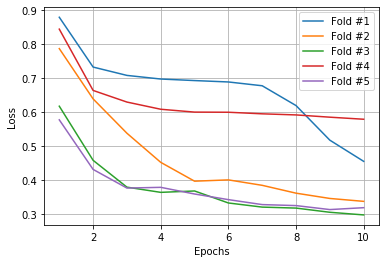

In [19]:
plot_loss_graph = plot_loss
itr=range(1,(epochs+1))
for i in range(1,fold+1):
    plt.plot(itr,plot_loss_graph[i-1],label="Fold #{}".format(i))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.savefig("k-fold_loss.eps")
plt.savefig("k-fold_loss.png",dpi=150)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


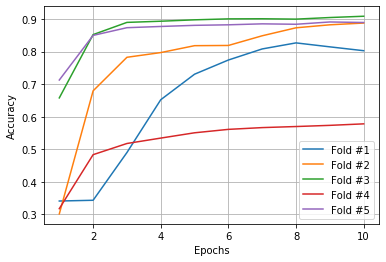

In [20]:
plt.clf()
plot_acc_graph = plot_acc
itr=range(1,(epochs+1))
for i in range(1,fold+1):
    plt.plot(itr,plot_acc_graph[i-1],label="Fold #{}".format(i))

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.savefig("k-fold_acc.eps",dpi=150)
plt.savefig('k-fold_acc.png',dpi=150)
plt.show()

In [21]:
# Write the cross-validated prediction (from the last neural network)
X_holdout = np.expand_dims(x_holdout, axis=2)

holdout_pred = model.predict(X_holdout)
holdout_pred = np.argmax(holdout_pred, axis=1)
y_holdout_compare = np.argmax(y_holdout, axis=1)
score = metrics.accuracy_score(y_holdout_compare,holdout_pred)
print("Holdout score (accuracy): {}".format(score))



elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Holdout score (accuracy): 0.9063157894736842
Elapsed time: 0:00:45.69


In [22]:
# Write the cross-validated prediction (from the last neural network)

X_holdout = np.expand_dims(x_holdout, axis=2)
holdout_pred = model.predict(X_holdout)

score = metrics.log_loss(y_holdout, holdout_pred)
print("Log loss score: {}".format(score))

Log loss score: 0.26766737557357134


In [23]:
# Measure accuracy
holdout_pred = model.predict(X_holdout)
holdout_pred = np.argmax(holdout_pred, axis=1)
y_holdout_compare = np.argmax(y_holdout, axis=1)
score = metrics.accuracy_score(y_holdout_compare, holdout_pred)
print("Final accuracy: {}".format(score))

Final accuracy: 0.9063157894736842


## Output

In [24]:
history_dict = history.history

history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

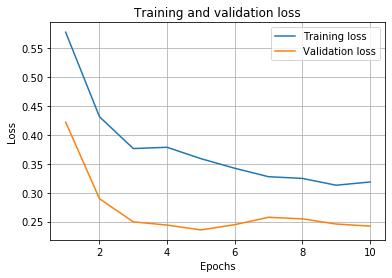

In [25]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss,  label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss,  label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.savefig('loss.png',dpi=150)
plt.show()


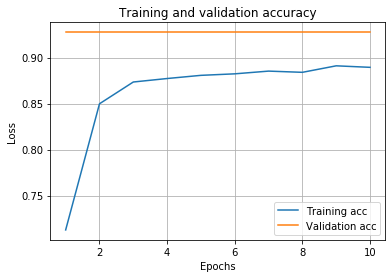

In [26]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc,  label='Training acc')
plt.plot(epochs, val_acc,  label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.savefig('acc.png',dpi=150)
plt.show()

## Visualization Functions

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.grid()
    #plt.savefig('roc1.png',dpi=150)
    plt.show()   

### Confusion Matrix

Confusion matrix, without normalization
[[705   0]
 [ 55   0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


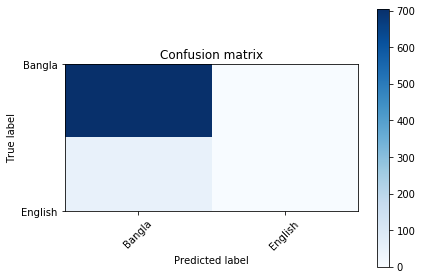

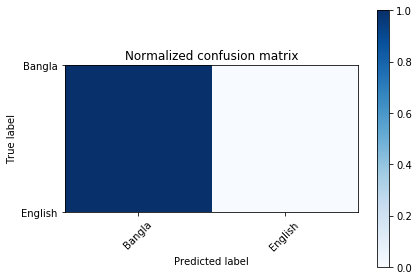

In [28]:
import numpy as np

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_compare, pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, signal)
plt.savefig('cm.png',dpi=150)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, signal, title='Normalized confusion matrix')
plt.savefig('norm_cm.png',dpi=150)
plt.show()

In [29]:
[[TP,FN],[FP,TN]]=cm

Acc=(TP+TN)/(TP+TN+FP+FN)
print("Overall Accuracy: ",Acc*100)

Se=(TP)/(TP+FN)
print("Sensitivity: ",Se*100)

Sp=(TN)/(TN+FP)
print("Specificity: ",Sp*100)

ER=(FP+FN)/(TP+TN+FP+FN)
print("Error Rate: ",ER*100)

Overall Accuracy:  92.76315789473685
Sensitivity:  100.0
Specificity:  0.0
Error Rate:  7.236842105263158


### ROC Chart

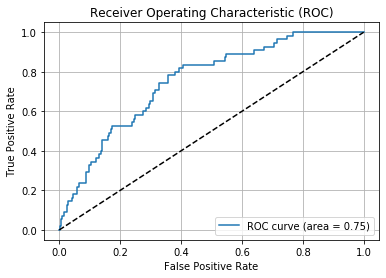

<Figure size 432x288 with 0 Axes>

In [30]:
pred = model.predict(X_test)
pred = pred[:,1] # Only positive cases
plot_roc(pred,y_compare)
plt.savefig('roc.png',dpi=150)

In [31]:
pred

array([5.90e-02, 9.25e-02, 3.89e-01, 2.15e-01, 4.53e-02, 1.08e-02,
       2.89e-02, 6.15e-03, 2.61e-01, 3.78e-02, 1.55e-03, 6.09e-04,
       6.05e-02, 1.34e-02, 2.48e-02, 2.68e-02, 2.67e-01, 1.82e-01,
       3.25e-03, 2.18e-01, 1.19e-02, 2.18e-02, 1.07e-02, 3.29e-02,
       2.62e-02, 3.05e-01, 1.28e-03, 6.92e-03, 2.32e-02, 5.10e-03,
       9.09e-03, 1.94e-01, 9.75e-03, 1.03e-02, 1.31e-03, 1.41e-03,
       2.35e-01, 1.47e-01, 2.97e-02, 2.69e-03, 2.14e-01, 2.45e-01,
       3.22e-02, 1.47e-02, 7.35e-02, 5.67e-04, 1.24e-01, 2.55e-01,
       1.07e-02, 6.31e-02, 4.99e-02, 3.03e-01, 1.43e-02, 1.02e-02,
       4.00e-02, 6.96e-02, 1.11e-02, 8.02e-03, 2.47e-02, 2.63e-01,
       4.61e-02, 2.03e-01, 8.38e-03, 1.46e-01, 1.06e-02, 3.52e-01,
       8.04e-03, 2.71e-02, 4.92e-02, 4.90e-03, 9.54e-02, 3.08e-03,
       1.71e-01, 8.58e-04, 2.13e-01, 3.30e-02, 2.89e-02, 3.11e-01,
       5.81e-03, 2.43e-01, 7.49e-02, 2.74e-01, 1.07e-01, 3.57e-02,
       3.66e-02, 1.64e-02, 2.40e-02, 1.22e-01, 2.53e-01, 2.13e

### Log-loss score

In [32]:
from IPython.display import display

# Don't display numpy in scientific notation
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

# Generate predictions
pred = model.predict(X_test)

print("Numpy array of predictions")
print(pred[0]*100)

print("As percent probability")
display(pred[0:5])

score = metrics.log_loss(y_test, pred)
print("Log loss score: {}".format(score))

Numpy array of predictions
[91.5103  5.8978]
As percent probability


array([[0.9151, 0.059 ],
       [0.871 , 0.0925],
       [0.5968, 0.389 ],
       [0.7442, 0.2153],
       [0.9322, 0.0453]], dtype=float32)

Log loss score: 0.24031013370643595


# Holdout Predictions

In [33]:
# Write the cross-validated prediction (from the last neural network)

X_holdout = np.expand_dims(x_holdout, axis=2)
holdout_pred = model.predict(X_holdout)

score = metrics.log_loss(y_holdout, holdout_pred)
print("Log loss score: {}".format(score))

Log loss score: 0.26766737557357134


In [34]:
# Measure accuracy
holdout_pred = model.predict(X_holdout)
holdout_pred = np.argmax(holdout_pred, axis=1)
y_holdout_compare = np.argmax(y_holdout, axis=1)
score = metrics.accuracy_score(y_holdout_compare, holdout_pred)
print("Final accuracy: {}".format(score))

Final accuracy: 0.9063157894736842


## Confusion Matrix

Confusion matrix, without normalization
[[861   0]
 [ 89   0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


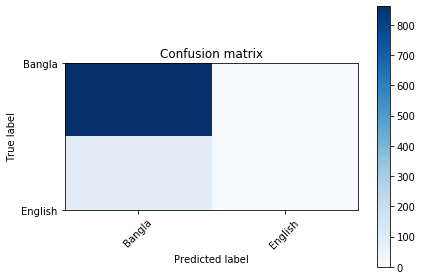

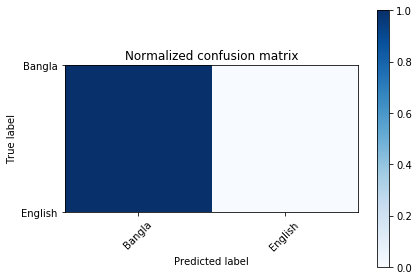

In [35]:
import numpy as np

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_holdout_compare, holdout_pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, signal)
plt.savefig('cm2.png',dpi=150)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, signal, title='Normalized confusion matrix')
plt.savefig('norm_cm2.png',dpi=150)
plt.show()

In [36]:
print(confusion_matrix(y_holdout_compare, holdout_pred))  
print(classification_report(y_holdout_compare, holdout_pred))

[[861   0]
 [ 89   0]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       861
           1       0.00      0.00      0.00        89

    accuracy                           0.91       950
   macro avg       0.45      0.50      0.48       950
weighted avg       0.82      0.91      0.86       950



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [37]:
[[TP,FN],[FP,TN]]=cm

Acc=((TP+TN)/(TP+TN+FP+FN)) * 100
print("Overall Accuracy: ", Acc)

Se=(TP)/(TP+FN)
print("Sensitivity: ", Se*100)

Sp=(TN)/(TN+FP)
print("Specificity: ",Sp*100)

ER=(FP+FN)/(TP+TN+FP+FN)
print("Error Rate: ",ER*100)

Overall Accuracy:  90.63157894736842
Sensitivity:  100.0
Specificity:  0.0
Error Rate:  9.368421052631579


## ROC Chart

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

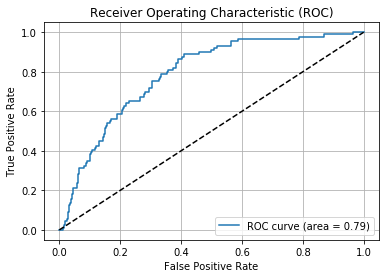

<Figure size 432x288 with 0 Axes>

In [38]:
holdout_pred = model.predict(X_holdout)
holdout_pred = holdout_pred[:,1] # Only positive cases
fig = plt.figure()
plt.figure()

plot_roc(holdout_pred, y_holdout_compare)
plt.savefig('roc2.png',dpi=150)
plt.show()

In [0]:
model.save('be.h5')

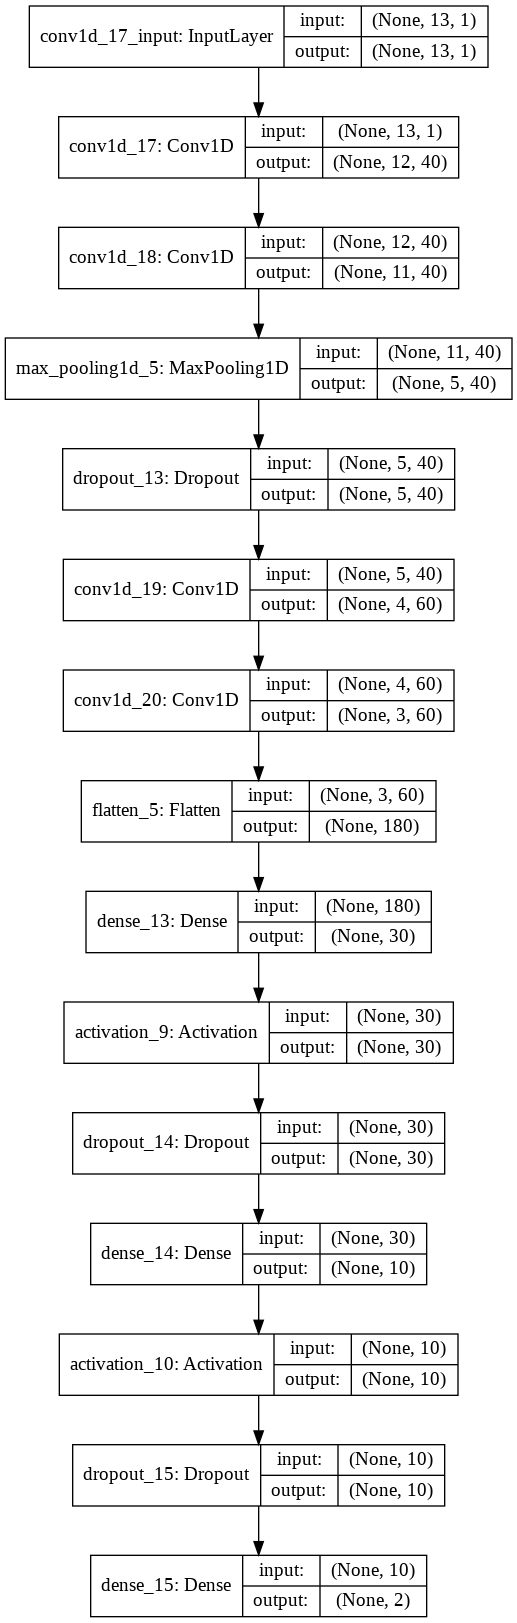

In [40]:
from keras.utils import plot_model
plot_model(model,show_shapes = True, to_file = 'model_10.png')

In [41]:
###### import model #####

import time
tic=time.time()
from keras.models import load_model
my_model=load_model('be.h5')
toc=time.time()
print(str(1000*(toc-tic))+"ms")


3431.584358215332ms


In [42]:
import pandas as pd
import io
df3 = pd.read_csv(io.StringIO(uploaded['bt.csv'].decode('utf-8')))
print(df3)
df4 = pd.read_csv(io.StringIO(uploaded['et.csv'].decode('utf-8')))
print(df4)

            S1        S2         S3  ...        S11       S12       S13
0    22.737841  2.399196 -10.172267  ...  -3.202369  4.119467 -0.361488
1    22.952436  2.245480 -10.264699  ...  -5.221063  3.148670 -0.091942
2    22.908935  2.616482  -9.529749  ...  -4.238645  0.872314  0.510450
3    22.874865  2.777719  -9.322682  ...  -2.860533 -0.292973 -1.814406
4    22.951451  2.940011  -9.315593  ...  -5.893608  0.052298 -1.191790
..         ...       ...        ...  ...        ...       ...       ...
426  23.043558  2.309610  -9.500446  ... -10.556533  5.016231  6.676602
427  23.100006  2.127406  -9.473743  ... -13.351370  5.457447  7.733076
428  23.029893  2.270314  -9.276543  ... -14.115802  5.344738  7.897555
429  22.948504  2.551206  -8.948374  ... -12.738061  3.511363  7.457604
430  23.061913  1.940424  -8.938372  ... -14.726312  3.566904  9.495983

[431 rows x 13 columns]
            S1        S2         S3  ...       S11       S12       S13
0    21.782855  2.749247  -9.398894  ...

In [0]:
## NOIZEUS CLEAN DATA AND RECORDED NOISY data testing .

import pandas as pd
import io
import requests
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping

#path = "./data/"

#filename3 = os.path.join(path,"Clean_norm_test_250ms.csv")    
#df3 = pd.read_csv(filename3,na_values=['NA','?'])

#filename4 = os.path.join(path,"Noisy_test_250ms.csv")    
#df4 = pd.read_csv(filename4,na_values=['NA','?'])
#frames = [df3, df4]
#df5 = pd.concat(frames, keys=['x', 'y'])

# Shuffle
np.random.seed(42)
df3 = df3.reindex(np.random.permutation(df3.index))
df3.reset_index(inplace=True, drop=True)

np.random.seed(42)
df4 = df4.reindex(np.random.permutation(df4.index))
df4.reset_index(inplace=True, drop=True)


#signal = encode_text_index(df5,"signal")
#x_holdout,y_holdout = to_xy(df5,"signal")



In [0]:
#x_holdout = scaler.transform(x_holdout) 

In [45]:
df3

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13
0,23.280676,2.509755,-10.116877,6.345460,-7.848785,4.956002,-8.553533,2.496645,-9.298445,-2.166238,-7.722053,3.941438,1.272366
1,22.894145,2.878973,-9.355654,7.398453,-7.276652,6.411909,-5.661400,2.118531,-5.905707,3.124200,-3.459312,2.960453,-3.822101
2,23.235703,2.802885,-9.357289,4.754671,-7.018017,5.146831,-9.252464,-1.147857,-16.913380,-8.026330,-9.943338,2.711380,3.465274
3,22.498366,2.196470,-9.784616,6.775590,-6.638229,8.218653,-1.769707,7.761688,3.051142,13.435087,2.427018,0.378053,-11.103972
4,22.944032,2.571798,-10.079095,5.125062,-7.736008,6.861284,-3.528584,4.193993,-1.022704,8.535815,-2.133987,3.429809,-6.937412
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,23.486866,2.311978,-10.287448,7.428119,-5.837061,9.350814,-6.277030,0.489876,-4.393839,5.731565,-10.322669,4.063218,-4.210385
427,22.501261,3.496868,-8.226043,7.905971,-6.437381,3.359801,-10.005868,1.704459,-10.371967,-4.710131,-5.384541,4.406994,3.793802
428,23.313686,3.302396,-8.616918,7.564259,-6.515046,6.471744,-6.289568,1.899163,-7.436515,0.875214,-5.065525,4.057958,1.759017
429,23.616022,1.091893,-10.162498,6.517378,-11.825090,0.647370,-5.452832,0.775211,2.200242,5.286658,-0.762708,3.285617,1.137759


In [46]:
df4

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13
0,22.492006,0.947644,-10.021860,6.555310,-5.212607,8.517220,-3.202073,14.388020,7.627345,19.520229,7.537034,1.464750,-14.314288
1,21.789058,-0.643863,-11.043081,5.138541,-9.136033,5.764689,-3.629623,9.217161,10.092070,26.260242,15.790774,0.329434,-17.094361
2,21.353676,1.534222,-10.165514,4.775447,-9.838070,5.379219,-1.755932,7.295117,4.446408,14.290919,5.725640,1.499035,-7.923401
3,21.826984,1.579191,-10.261896,7.474569,-8.460739,7.025112,-2.841640,8.413548,2.031862,9.950014,1.219737,-1.111351,-9.202801
4,20.702696,1.941602,-9.785126,7.164681,-6.761303,7.521014,-3.629222,10.915928,0.668616,8.442400,2.356029,3.378060,-8.803149
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,21.932683,1.240352,-11.031937,6.220696,-9.425331,2.706075,-10.147093,-1.210893,-12.693749,-6.375042,-10.675876,2.701038,2.544204
427,21.698649,2.031877,-10.160883,4.832978,-7.390836,6.548242,-4.365057,7.944611,-1.414880,10.790862,3.366315,2.857118,-9.018990
428,23.164832,1.557138,-11.079280,6.300789,-8.439545,6.521638,-4.472222,7.278699,0.672578,9.216444,-0.450271,3.052589,-5.336920
429,21.556025,2.261694,-10.386048,6.112747,-8.236585,5.674168,-5.259701,4.949012,-4.558478,2.702302,-5.015888,2.837712,-0.329107


In [0]:
Total_clean = df3.shape[0]
Total_noisy4 = df4.shape[0]

In [48]:
Total_clean

431

In [49]:
Total_noisy4

431

In [0]:

x_holdout_clean = df3
X_holdout_clean = np.expand_dims(x_holdout_clean, axis=2)

x_holdout_noisy4 = df4
X_holdout_noisy4 = np.expand_dims(x_holdout_noisy4, axis=2)




In [0]:
# Prediction for clean data

pred_clean = my_model.predict(X_holdout_clean)
pred_clean = np.argmax(pred_clean,axis=1)
clean_pred = 0
for i in range (0,Total_clean):
    if pred_clean[i] == 0: 
        clean_pred = clean_pred + 1   # clean =0 absence of noise
          
    


In [0]:
# Prediction for noisy data

pred_noisy4 = my_model.predict(X_holdout_noisy4)
pred_noisy4 = np.argmax(pred_noisy4,axis=1)
noisy_pred4 = 0
for i in range (0,Total_noisy4):
    if pred_noisy4[i] == 1: 
        noisy_pred4 = noisy_pred4 + 1   # noisy =1 presence of noise
          
    


In [53]:
#######For clean signal ######

Accuracy = clean_pred / (Total_clean)
print("Total_frames:",Total_clean)
print("Predicted:",clean_pred)
print("Noisy",Total_clean-clean_pred)
print("Accuracy:", Accuracy*100)
print("Acurracy for noisy", 100-(Accuracy*100))


Total_frames: 431
Predicted: 431
Noisy 0
Accuracy: 100.0
Acurracy for noisy 0.0


In [54]:

#######For Noisy signal ######
Accuracy = noisy_pred4 / (Total_noisy4)
print("For (cleanspeech + 0.1(Noise))")
print("Total_frames:",Total_noisy4)
print("Predicted:",noisy_pred4)
print("Noisefre",Total_noisy4-noisy_pred4)
print("Accuracy:", Accuracy*100)
print("Acurracy for noisefree", 100-(Accuracy*100))
print("")


For (cleanspeech + 0.1(Noise))
Total_frames: 431
Predicted: 0
Noisefre 431
Accuracy: 0.0
Acurracy for noisefree 100.0



In [58]:
## NOIZEUS CLEAN DATA AND RECORDED NOISY data testing .

import pandas as pd
import io
import requests
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping

#path = "./data/"

#filename3 = os.path.join(path,"FEMALE_testing_label.csv")    
#df3 = pd.read_csv(filename3,na_values=['NA','?'])

#filename4 = os.path.join(path,"0.1Fraction_label.csv")    
#df4 = pd.read_csv(filename4,na_values=['NA','?'])
frames = [df1, df2]
df5 = pd.concat(frames, keys=['x', 'y'])

# Shuffle
np.random.seed(42)
df5 = df5.reindex(np.random.permutation(df5.index))
df5.reset_index(inplace=True, drop=True)


signal = encode_text_index(df5,"signal")
x_holdout01,y_holdout01 = to_xy(df5,"signal")












/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:78: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [59]:
# Write the cross-validated prediction (from the last neural network)

X_holdout01 = np.expand_dims(x_holdout01, axis=2)
holdout_pred01 = my_model.predict(X_holdout01)
score = metrics.log_loss(y_holdout01, holdout_pred01)
print("Log loss score: {}".format(score))

# Measure accuracy
holdout_pred01 = np.argmax(holdout_pred01, axis=1)
y_holdout_compare01 = np.argmax(y_holdout01, axis=1)
score = metrics.accuracy_score(y_holdout_compare01, holdout_pred01)
print("Final accuracy: {}".format(score))




# Write the cross-validated prediction (from the last neural network)




Log loss score: 0.2651155084775896
Final accuracy: 0.9092631578947369


Confusion matrix, without normalization
[[4319    0]
 [ 431    0]]

Overall Accuracy:  90.92631578947369
Sensitivity:  100.0
Specificity:  0.0
Error Rate:  9.073684210526316




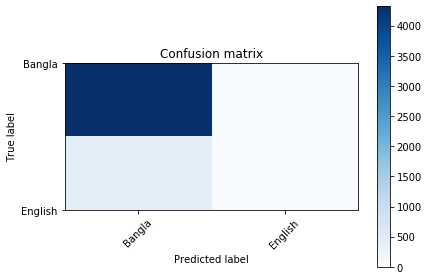

In [60]:
import numpy as np

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_holdout_compare01, holdout_pred01)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, signal)
plt.savefig('0.1Fraction.png',dpi=150)
print('')
[[TP,FN],[FP,TN]]=cm

Acc=((TP+TN)/(TP+TN+FP+FN)) * 100
print("Overall Accuracy: ", Acc)

Se=(TP)/(TP+FN)
print("Sensitivity: ", Se*100)

Sp=(TN)/(TN+FP)
print("Specificity: ",Sp*100)

ER=(FP+FN)/(TP+TN+FP+FN)
print("Error Rate: ",ER*100)
print('')
print('')











In [61]:
my_model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_17 (Conv1D)           (None, 12, 40)            120       
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 11, 40)            3240      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 5, 40)             0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 5, 40)             0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 4, 60)             4860      
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 3, 60)             7260      
_________________________________________________________________
flatten_5 (Flatten)          (None, 180)              